In [3]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore" )

In [4]:
#reading the data set named as train

df=pd.read_csv("Wine_Quality_Data.csv",header=0)

In [5]:
# Checking the shape of the data
df.shape

(6497, 13)

In [6]:
df.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
5809,6.0,0.170,0.21,6.0,0.050,26.0,134.0,0.99390,3.08,0.54,9.8,6,white
2142,6.7,0.240,0.41,8.7,0.036,29.0,148.0,0.99520,3.22,0.62,9.9,6,white
4166,6.6,0.240,0.28,1.8,0.028,39.0,132.0,0.99182,3.34,0.46,11.4,5,white
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,5,red
5377,6.3,0.150,0.30,1.4,0.022,38.0,100.0,0.99099,3.42,0.57,11.4,7,white


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [10]:
df.nunique()

fixed_acidity           106
volatile_acidity        187
citric_acid              89
residual_sugar          316
chlorides               214
free_sulfur_dioxide     135
total_sulfur_dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
color                     2
dtype: int64

# Data Cleaning

In [11]:
#total number of missing value in a table of each column

df.isnull().sum() 

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [12]:
# printing total number of duplicate values
df.duplicated().sum()

1177

In [13]:
df1 = df.drop_duplicates()

In [14]:
print(df1.duplicated().sum())

0


In [15]:
df1.shape

(5320, 13)

In [16]:
# Excluding/separating a categorical column from numerical columns

num_df=df1.select_dtypes(exclude=['object'])

In [17]:
# separating numerical columns from categorical

cat_df=df1.select_dtypes(exclude=['float64','int64'])

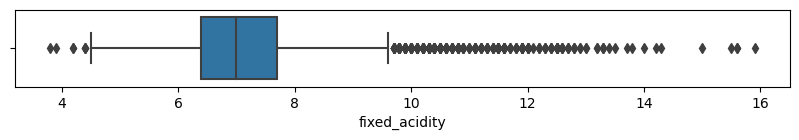

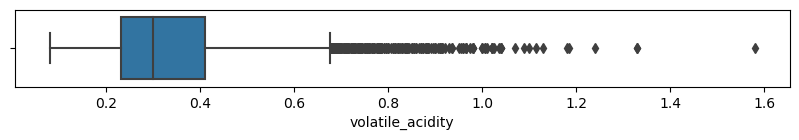

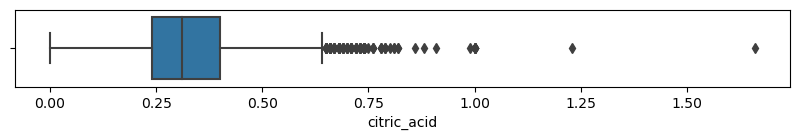

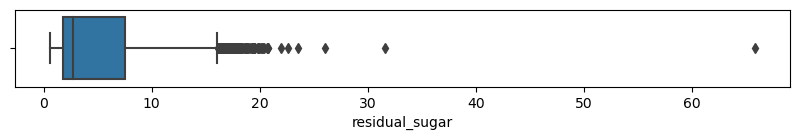

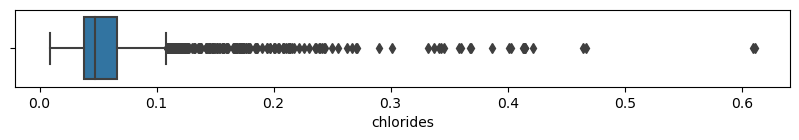

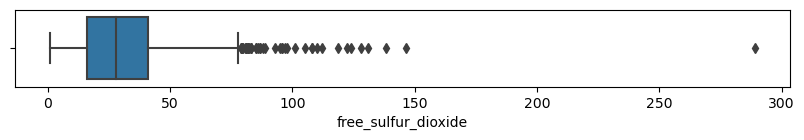

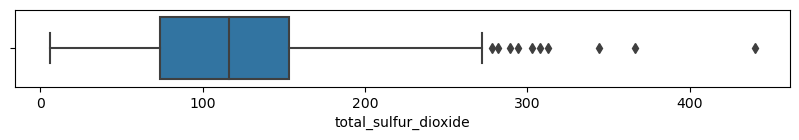

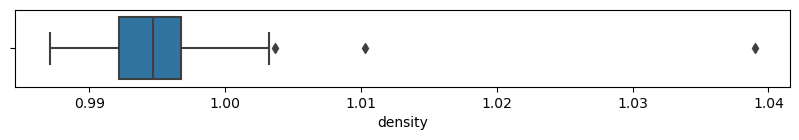

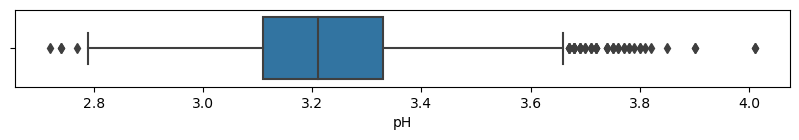

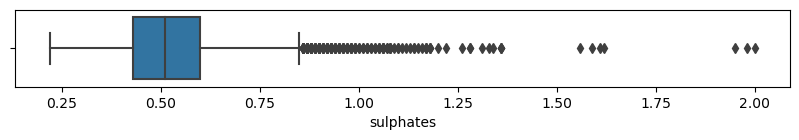

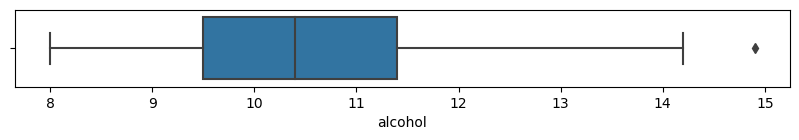

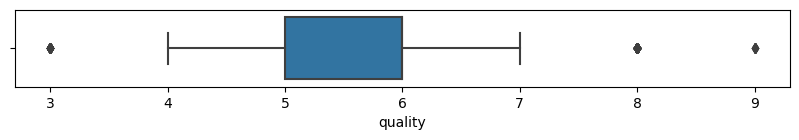

In [18]:
# Applying a box-plot to check the outliers
for column in num_df:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=num_df,x=column)

In [19]:
# outlier treatment

def cap_data(num_df):
    for col in num_df.columns:
        print("capping the",col)
        if (((num_df[col].dtype)=='float64')|((num_df[col].dtype)=='int64')):
            percentiles = num_df[col].quantile([0.25,0.75]).values
            num_df[col][num_df[col] <= percentiles[0]] = percentiles[0]
            num_df[col][num_df[col] >= percentiles[1]] = percentiles[1]
        else:
            num_df[col]=num_df[col]
    return num_df
final_num_df = cap_data(num_df)


capping the fixed_acidity
capping the volatile_acidity
capping the citric_acid
capping the residual_sugar
capping the chlorides
capping the free_sulfur_dioxide
capping the total_sulfur_dioxide
capping the density
capping the pH
capping the sulphates
capping the alcohol
capping the quality


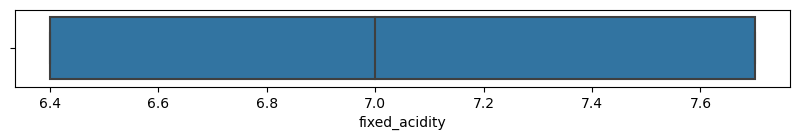

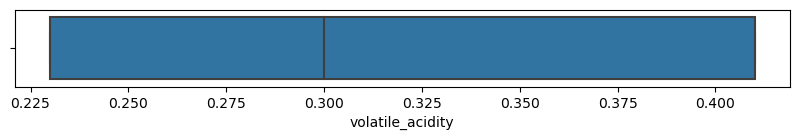

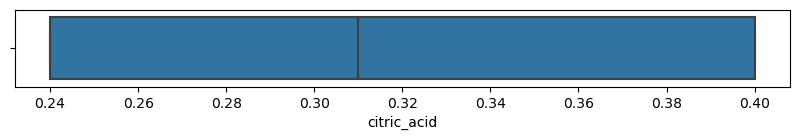

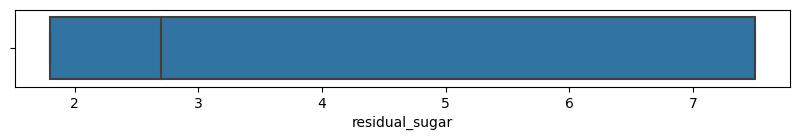

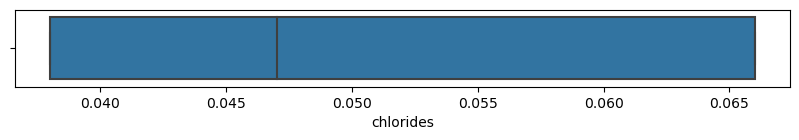

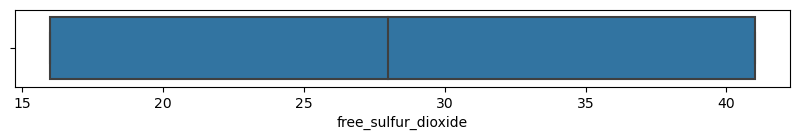

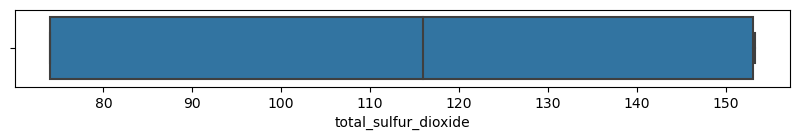

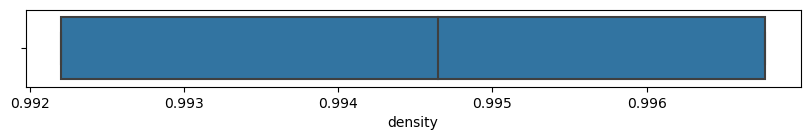

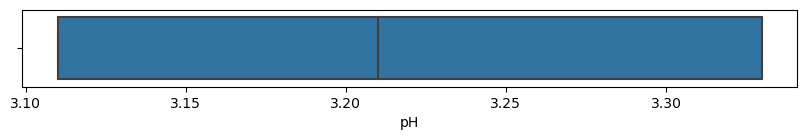

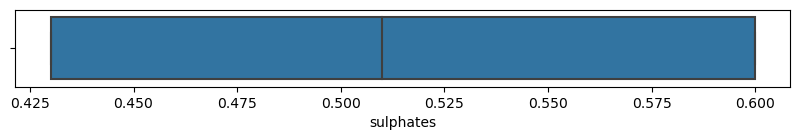

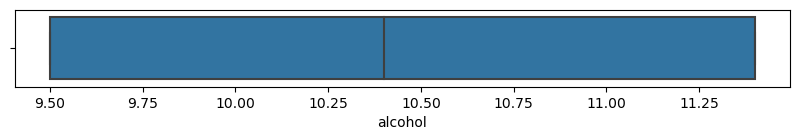

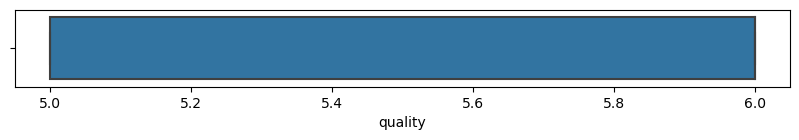

In [20]:
# Applying a box-plot to check the outliers
for column in num_df:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=num_df,x=column)

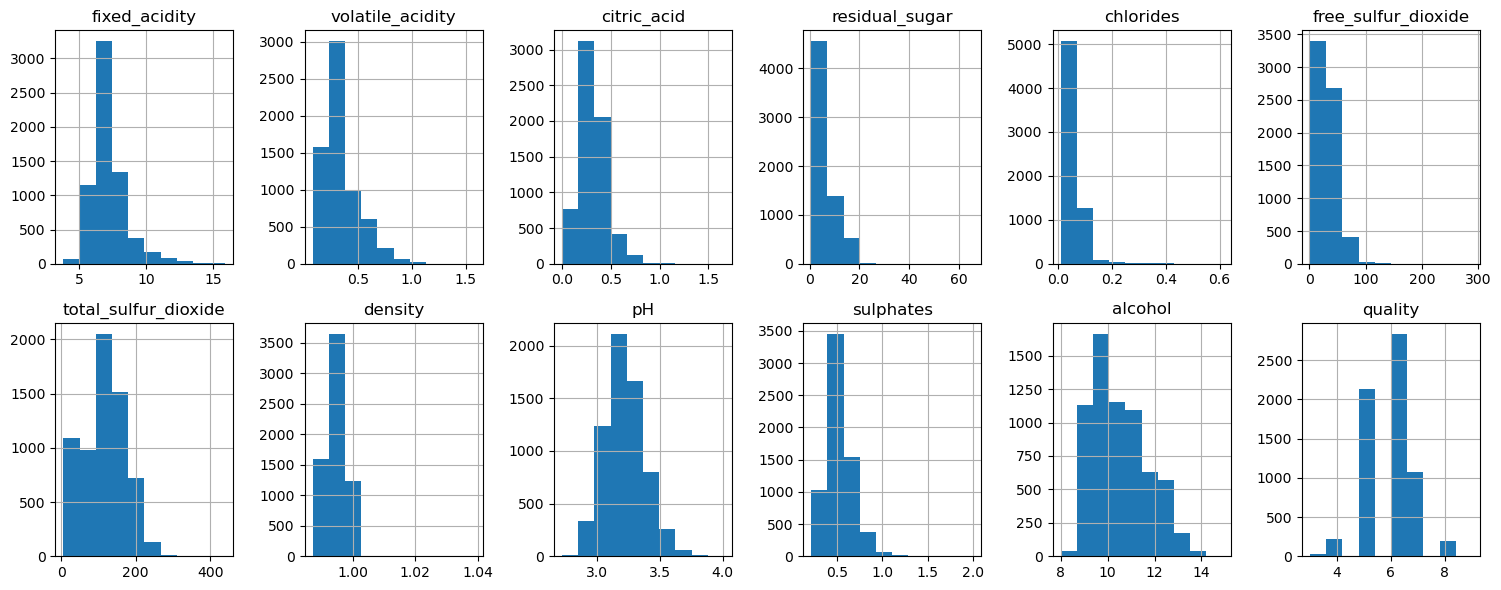

In [21]:
import matplotlib.pyplot as plt

# Create a histogram for each numerical feature
fig, axs = plt.subplots(nrows=2,ncols=6,figsize=(15, 6))
for i, feature in enumerate(num_df):
    ax = axs[i // 6, i % 6]
    #ax = axs[i]
    df[feature].hist(ax=ax)
    ax.set_title(feature)
plt.tight_layout()
plt.show()


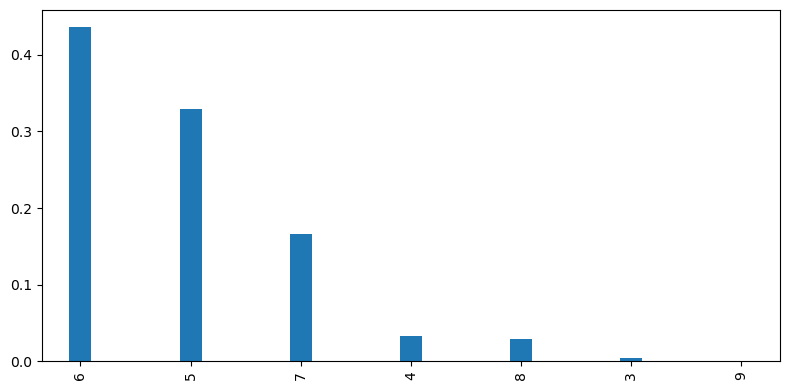

In [22]:
fig, axes =plt.subplots(figsize=(8,4))
df['quality'].value_counts(normalize=True).plot.bar(width=0.2)

plt.tight_layout()
plt.show()

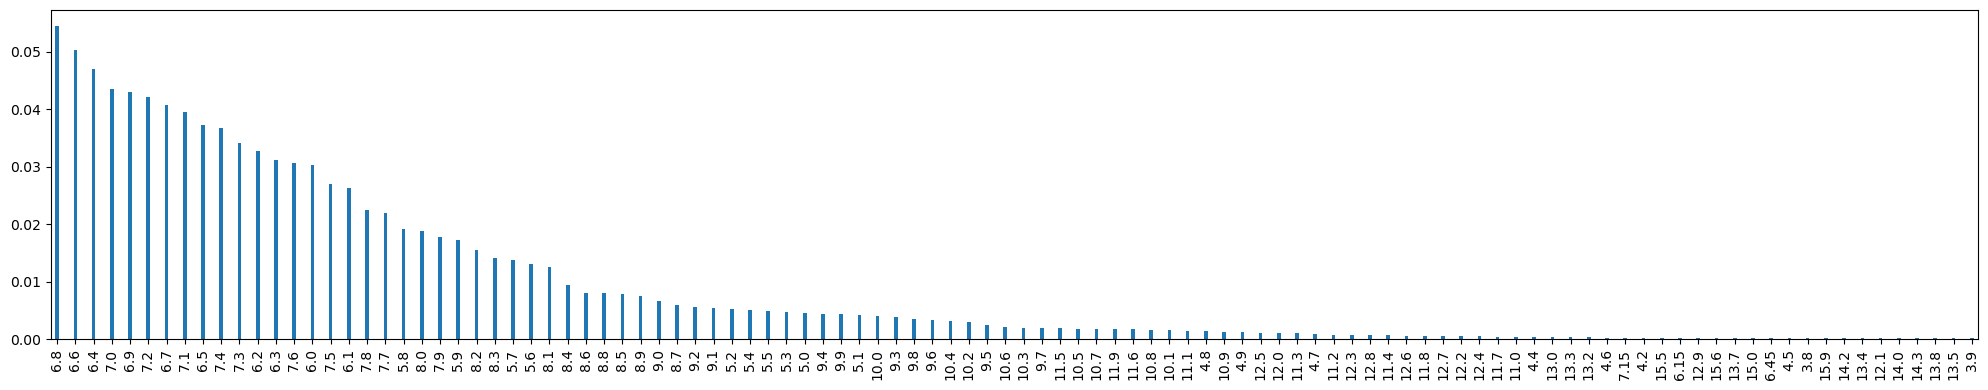

In [23]:
fig, axes =plt.subplots(figsize=(20,4))
df['fixed_acidity'].value_counts(normalize=True).plot.bar(width=0.2)

plt.tight_layout()
plt.show()

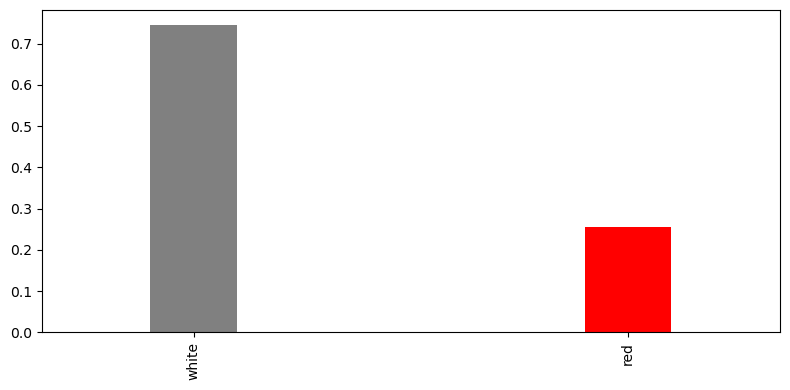

In [24]:
# countplot to check the distribution of the target variable
fig, axes =plt.subplots(figsize=(8,4))
cat_df['color'].value_counts(normalize=True).plot.bar(width=0.2, color=('grey','red'))

plt.tight_layout()
plt.show()

In [25]:
# Converting non numerical column into numerical

from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder() 
cat_df['color'] = Label.fit_transform(cat_df[ 'color'])


In [26]:
cat_df

,color
0,0
1,0
2,0
3,0
5,0
...,...
6492,1
6493,1
6494,1
6495,1


In [27]:
# concatinating numerical and categorical columns 
data_frame=pd.concat([num_df,cat_df],axis=1)

In [28]:
data_frame

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.41,0.24,1.9,0.066,16.0,74.00,0.99677,3.33,0.56,9.5,5,0
1,7.7,0.41,0.24,2.6,0.066,25.0,74.00,0.99677,3.20,0.60,9.8,5,0
2,7.7,0.41,0.24,2.3,0.066,16.0,74.00,0.99677,3.26,0.60,9.8,5,0
3,7.7,0.28,0.40,1.9,0.066,17.0,74.00,0.99677,3.16,0.58,9.8,6,0
5,7.4,0.41,0.24,1.8,0.066,16.0,74.00,0.99677,3.33,0.56,9.5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.4,0.23,0.29,1.8,0.039,24.0,92.00,0.99220,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,7.5,0.047,41.0,153.25,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.24,1.8,0.041,30.0,111.00,0.99254,3.11,0.46,9.5,6,1
6495,6.4,0.29,0.30,1.8,0.038,20.0,110.00,0.99220,3.33,0.43,11.4,6,1


<AxesSubplot:>

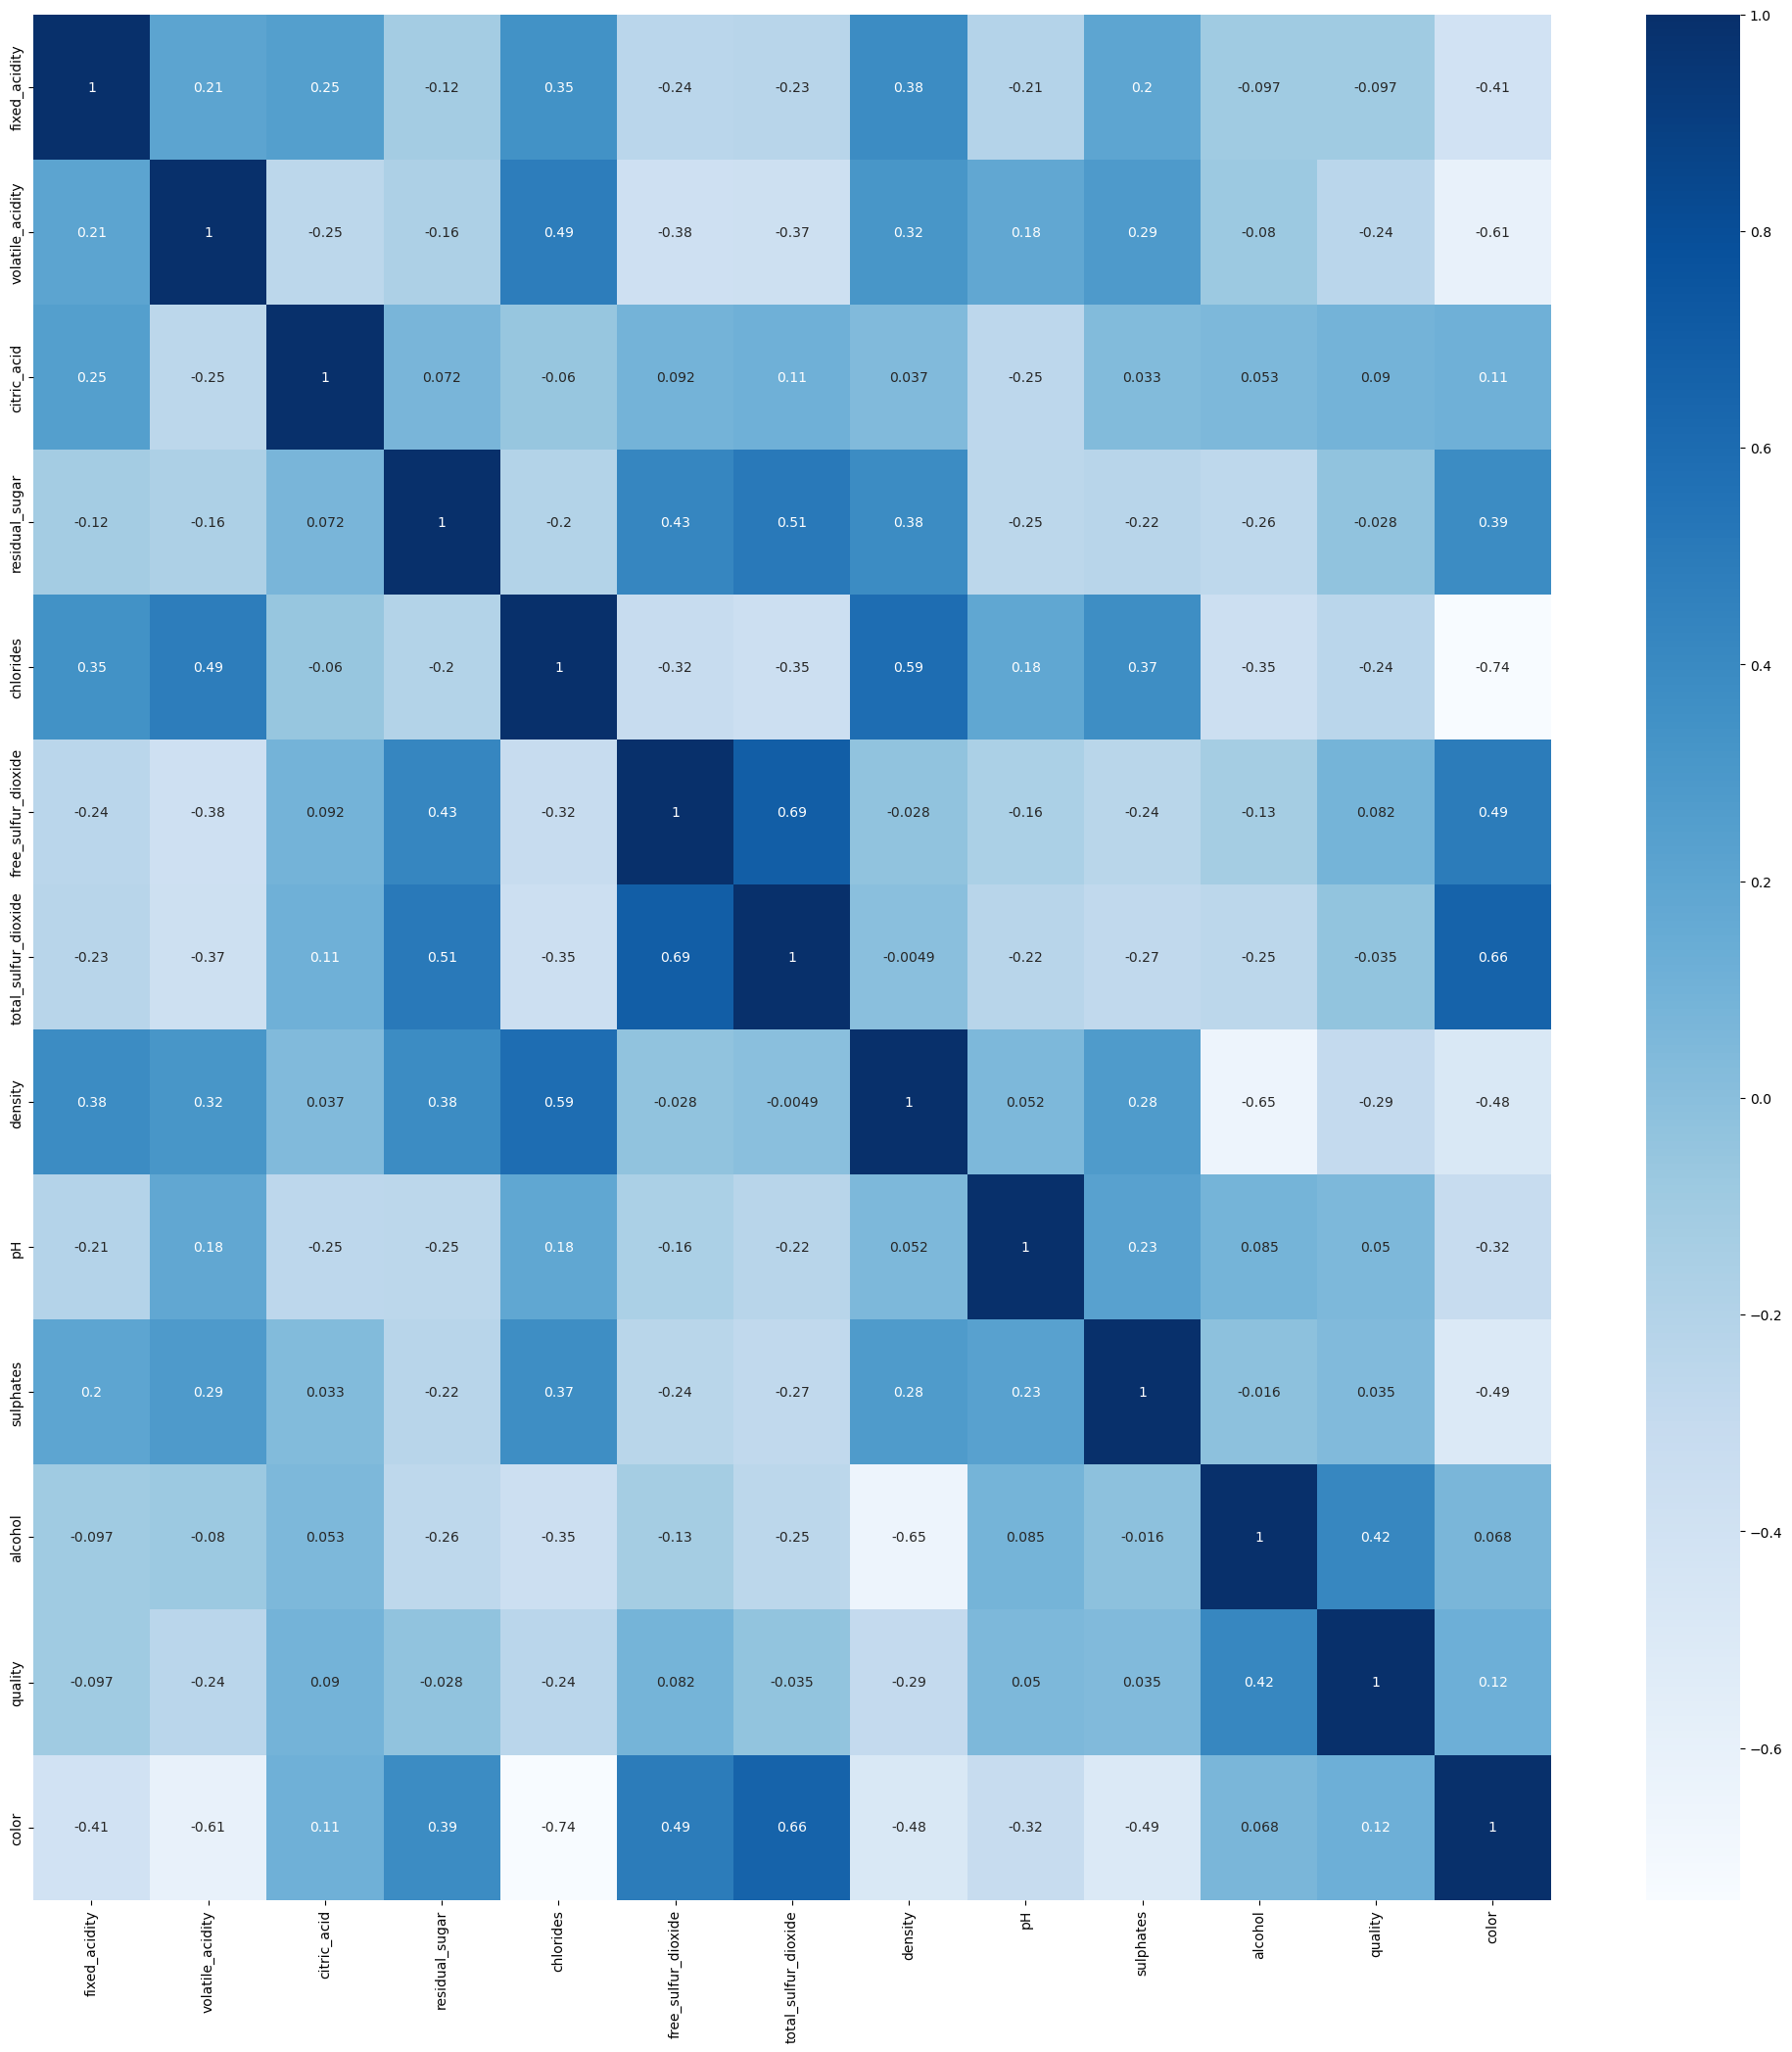

In [29]:
# 2D Correlation heatmap matrix
plt.figure(figsize=(25,25))
sns.heatmap(data_frame.corr(),cbar=True,annot=True,cmap='Blues')

In [30]:
# Define target variable and list of features
target_var = "color"
features = data_frame.select_dtypes(include='number').columns.tolist()
features.remove(target_var)

# Set correlation threshold
corr_threshold = 0.2

# Drop features with low correlation
for feature in features:
    corr = data_frame[feature].corr(data_frame[target_var])
    if abs(corr) < corr_threshold:
        data_frame = data_frame.drop(columns=[feature])
        print(f"Dropped column {feature} due to low correlation with target variable.")

Dropped column citric_acid due to low correlation with target variable.
Dropped column alcohol due to low correlation with target variable.
Dropped column quality due to low correlation with target variable.


In [31]:
# Separating the output from the dataset

X = data_frame.loc[:,data_frame.columns!="color"]


In [32]:
# Creating output column

y = data_frame["color"]


# train_test split

In [33]:
# Importing the train test split 

from sklearn.model_selection import train_test_split

In [34]:
# Separating the Training and testing Data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=2)

In [35]:
#y_train = np.array(y_train).reshape((-1, 1))

#  Feature Scaling

In [36]:
# Importing the standardscaler package for standardization

from sklearn.preprocessing import StandardScaler

In [37]:
# Applying the standardscaler to training data

sc = StandardScaler().fit(X_train)

In [38]:
# Transforming the training data into standard

X_train_std = sc.transform(X_train)
X_train_std

array([[-0.79158771,  1.36803795, -0.95240854, ..., -1.24440218,
        -1.22044156, -0.91833806],
       [ 1.28617469,  1.36803795, -0.78693962, ...,  1.20329578,
        -1.22044156,  0.68014924],
       [-1.16936269,  1.36803795, -0.95240854, ..., -1.24440218,
         0.58643285,  1.26141735],
       ...,
       [-0.22492524,  0.13298779, -0.95240854, ..., -0.28031983,
         0.0217846 , -1.20897211],
       [ 1.28617469,  0.81912677,  1.40552356, ...,  1.20329578,
        -1.22044156,  1.26141735],
       [-1.16936269, -1.10206237,  1.24005464, ...,  0.3088416 ,
         0.13471425, -1.20897211]])

In [39]:
def sigmoid(self, x):
        return 1 / (1 + np.exp(-z))
    

In [40]:
import numpy as np

class LogisticRegression():
    def __init__(self, learning_rate=0.01, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self,X,y):
            n_samples, n_features= X.shape
            self.weights=np.zeros(n_features)
            self.bias=0
            
            for i in range(self.num_iterations):
                linear_pred=np.dot(X, self.weights) + self.bias
                predictions=self.sigmoid(linear_pred)
                
                # calculating gradient for weight and bias
                dw=(1/n_samples) * np.dot(X.T,(predictions-y))
                db=(1/n_samples) *np.sum(predictions-y)
                
                
                # for updating weights and bias
                self.weights=self.weights-self.learning_rate*dw
                self.bias=self.bias-self.learning_rate*db
                
    def predict(self, X):
        Z = np.dot(self.weights, X.T) + self.bias
        LR = self.sigmoid(Z)
        class_pred = [0 if y<0.5 else 1 for y in LR]
        return class_pred


In [41]:

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test)

In [42]:
# Importing accuracy-score

from sklearn.metrics import accuracy_score

In [43]:
# Checking the accuracy Score

accuracy_score(y_test, y_pred)

0.7265037593984962

# train-test split for a model 

In [44]:
# Importing the train test split 

from sklearn.model_selection import train_test_split

In [45]:
# Separating the Training and testing Data

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,test_size=0.30,random_state=6)

#  Feature Scaling

In [46]:
# Importing the standardscaler package for standardization

from sklearn.preprocessing import StandardScaler

In [47]:
# Applying the standardscaler to training data

sc = StandardScaler().fit(X_train1)

In [48]:
# Transforming the training data into standard

X_train_std1 = sc.transform(X_train1)
X_train_std1

array([[ 0.16314769,  0.12396361,  1.41186452, ...,  0.25963872,
         1.25987361, -0.20136642],
       [-0.02636011,  1.3612371 , -0.86894464, ..., -0.56470354,
         1.25987361, -0.78222511],
       [ 1.30019448,  0.39891327, -0.37131355, ...,  1.20709702,
        -0.3163213 ,  1.25078029],
       ...,
       [ 0.35265549, -0.56341055, -0.95188315, ..., -1.23916538,
        -1.21700411, -0.78222511],
       [ 1.30019448, -0.01351122, -0.62012909, ...,  1.20709702,
         1.25987361,  1.25078029],
       [-0.5948835 , -0.70088538,  1.41186452, ...,  0.47375359,
         0.1340201 , -1.21786912]])

# Model building with sklearn

In [49]:
#importing LogisticRegression package

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)
predictions = model1.predict(X_test1)

In [50]:
# Importing accuracy-score

from sklearn.metrics import accuracy_score

In [51]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)


LogisticRegression()

In [52]:
# Checking the accuracy Score

accuracy_score(y_test1, predictions)

0.9580200501253133

In [53]:
# Retrieve the accuracy scores for stroke_prediction Model  in Notebook 2
#%store -r model1_nb2_scores

# Retrieve the accuracy scores for diabities Model  in Notebook 2
#%store -r model2_nb2_scores

# Define the accuracy scores for wine_quality Model without-sklearn in Notebook 3
model1_nb3_scores = [0.7265]

# Store the scores for Model 1 in Notebook 3
%store model1_nb3_scores

# Define the accuracy scores for wine_quality Model with-sklearn in Notebook 3
model2_nb3_scores = [0.9580]

# Store the scores for Model 2 in Notebook 3
%store model2_nb3_scores


Stored 'model1_nb3_scores' (list)
Stored 'model2_nb3_scores' (list)
